# Assignment: Advanced Regression

#### Importing the required libraries

In [1]:
import sys
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')
%matplotlib inline

#### Performing baisc checks in the dataset

In [2]:
house_price = pd.read_csv('train.csv')

In [3]:
house_price.shape

(1460, 81)

In [4]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
house_price.describe([0.25,0.50,0.75,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Checking the dataset for the amount of nulls present

In [7]:
round(house_price.isnull().sum()/len(house_price.index),2).sort_values(ascending=False).head(18)

PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
LotFrontage     0.18
GarageType      0.06
GarageCond      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
BsmtFinType1    0.03
BsmtExposure    0.03
BsmtCond        0.03
BsmtQual        0.03
BsmtFinType2    0.03
MasVnrArea      0.01
MasVnrType      0.01
dtype: float64

#### Considering 10% as my threshold and dropping the column having more then the threshold

In [8]:
round(house_price.isnull().sum()/len(house_price.index),2)[round(house_price.isnull().sum()/
                                                                 len(house_price.index),2).values>0.10]

LotFrontage    0.18
Alley          0.94
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [9]:
house_price = house_price.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','MoSold'],axis='columns')

#### Checking the columns where the missing values between 0-10%

In [10]:
round(house_price.isnull().sum()/len(house_price.index),2)[round(house_price.isnull().sum()/
                                                                 len(house_price.index),2).values>0.00]

MasVnrType      0.01
MasVnrArea      0.01
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
GarageType      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
GarageCond      0.06
dtype: float64

#### Before going further we will try to convert the Year columns with the age where we are going to fill these columns with number , And if we query the max year for all these columns these will come out to be 2010 ,EX suppose the YearBuilt=2000 , Then YearBuiltOld = 2010-2000 =10

In [11]:
house_price['YearBuilt_Old'] = house_price.YearBuilt.max()-house_price.YearBuilt
house_price['YearRemodAdd_Old'] = house_price.YearRemodAdd.max()-house_price.YearRemodAdd
house_price['GarageYrBlt_Old'] = house_price.GarageYrBlt.max()-house_price.GarageYrBlt
house_price['YrSold_Old'] = house_price.YrSold.max()-house_price.YrSold
house_price[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
1453,2006,2006,NaN,2006,4,4,NaN,4
1277,1967,1976,1967.0,2009,43,34,43.0,1
706,1971,2002,1971.0,2007,39,8,39.0,3
1178,1921,1950,1921.0,2009,89,60,89.0,1
1424,1958,1983,1970.0,2007,52,27,40.0,3
681,1932,2000,1968.0,2009,78,10,42.0,1
1294,1955,1990,1957.0,2006,55,20,53.0,4
348,2003,2004,2003.0,2008,7,6,7.0,2
1024,1976,1976,1976.0,2008,34,34,34.0,2
958,2003,2003,2003.0,2007,7,7,7.0,3


#### Lets drop the actual Year columns


In [12]:
house_price = house_price.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

#### Imputing missing value

#### Notice imputing GarageYrBlt_Old with -1 as these house donot have garage

In [13]:
house_price.MasVnrType.fillna('None',inplace=True)
house_price.MasVnrArea.fillna(house_price.MasVnrArea.mean(),inplace=True)
house_price.BsmtQual.fillna('TA',inplace=True)
house_price.BsmtCond.fillna('TA',inplace=True)
house_price.BsmtExposure.fillna('No',inplace=True)
house_price.BsmtFinType1.fillna('Unf',inplace=True)
house_price.BsmtFinType2.fillna('Unf',inplace=True)
house_price.GarageType.fillna('Attchd',inplace=True)
house_price.GarageYrBlt_Old.fillna(-1,inplace=True)
house_price.GarageFinish.fillna('Unf',inplace=True)
house_price.GarageQual.fillna('TA',inplace=True)
house_price.GarageCond.fillna('TA',inplace=True)

#### As per the analysis 'Street' & 'Utilities' is explaining the lowest valrience hence dropping these columns

In [14]:
house_price.Street.value_counts()
house_price.Utilities.value_counts()
house_price = house_price.drop(['Street','Utilities'],axis='columns')

#### 'Id' column is also of no use for our analysis hence dropping the column

In [15]:
house_price = house_price.drop('Id',axis='columns')

In [16]:
house_price[list(house_price.dtypes[house_price.dtypes!='object'].index)].describe()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,38.732192,25.134247,29.691096,2.184247
std,42.300571,9981.264932,1.382997,1.112799,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,...,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,30.202904,20.645407,25.121824,1.328095
min,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,0.000000,-1.000000,0.000000
25%,20.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,10.000000,6.000000,7.000000,1.000000
50%,50.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,37.000000,16.000000,25.500000,2.000000
75%,70.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,56.000000,43.000000,48.000000,3.000000
max,190.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000,138.000000,60.000000,110.000000,4.000000


In [17]:
# sns.boxplot(y = house_price['PoolArea'])
# house_price['WoodDeckSF'].value_counts()

#### Lets plot some graph for the EDA purpose

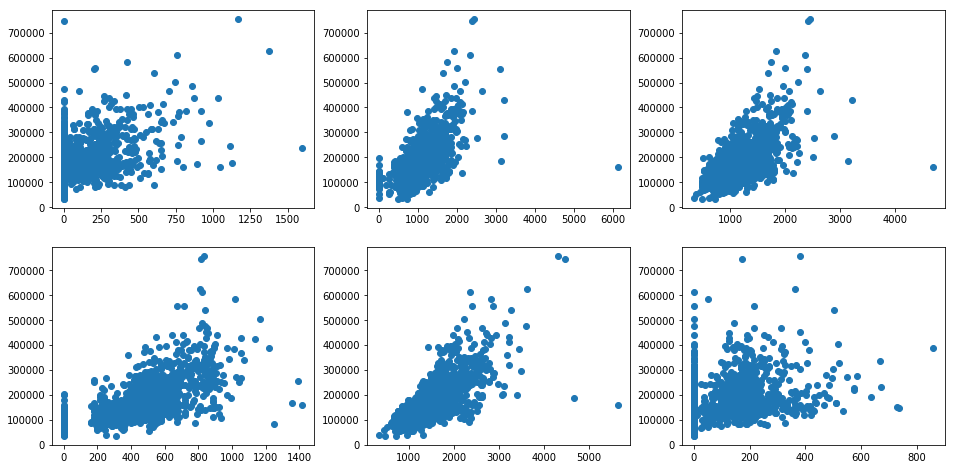

In [18]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(house_price.MasVnrArea,house_price.SalePrice)
plt.subplot(2,3,2)
plt.scatter(house_price.TotalBsmtSF,house_price.SalePrice)
plt.subplot(2,3,3)
plt.scatter(house_price['1stFlrSF'],house_price.SalePrice)
plt.subplot(2,3,4)
plt.scatter(house_price['GarageArea'],house_price.SalePrice)
plt.subplot(2,3,5)
plt.scatter(house_price['GrLivArea'],house_price.SalePrice)
plt.subplot(2,3,6)
plt.scatter(house_price['WoodDeckSF'],house_price.SalePrice)

#### Plotting heatmap to check the corellation between varables

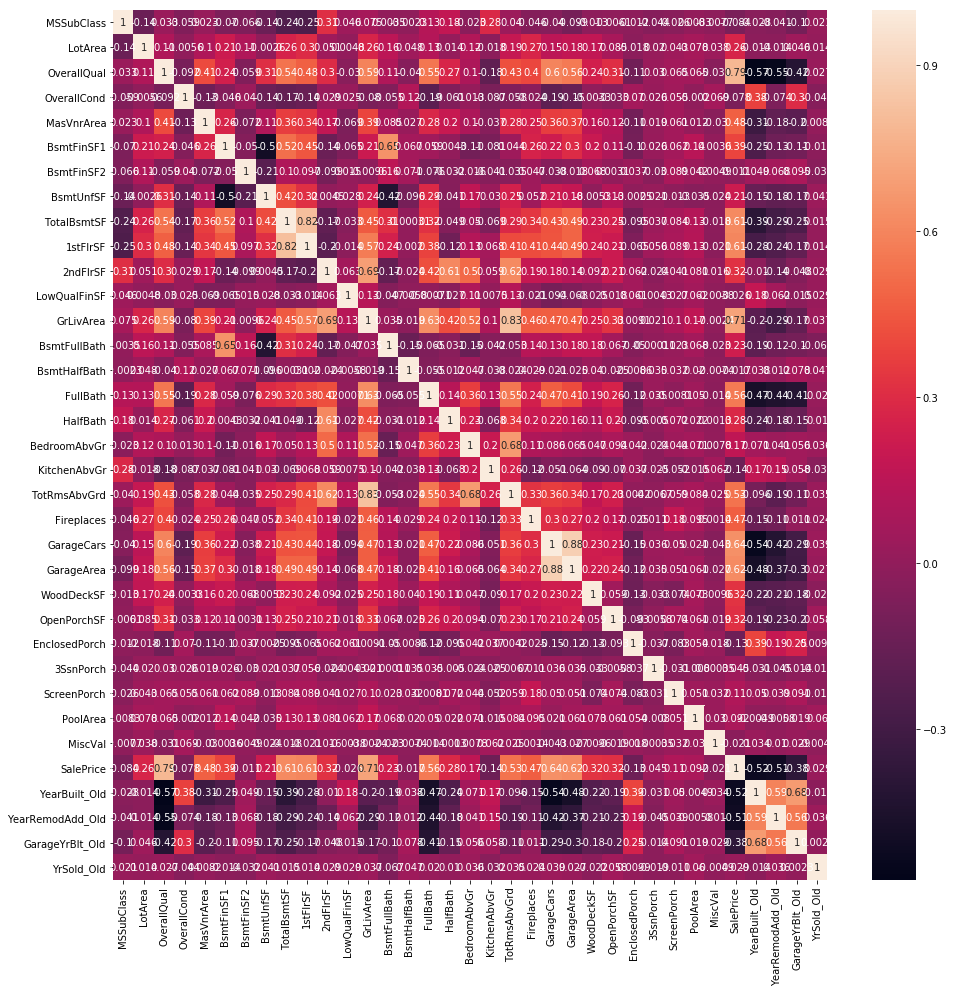

In [19]:
plt.figure(figsize=(16,16))
sns.heatmap(house_price[list(house_price.dtypes[house_price.dtypes!='object'].index)].corr(),annot=True)
plt.show()

#### Below function is used for hadling the outliers where i am taking the lower and upper quantile as 0.25 & 0.99 respectively

In [20]:
house_price.shape

(1460, 71)

In [21]:
num_col = list(house_price.dtypes[house_price.dtypes !='object'].index)
num_col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

house_price = drop_outliers(house_price)

In [22]:
house_price.shape

(1441, 71)

In [23]:
house_price[list(house_price.dtypes[house_price.dtypes=='object'].index)].head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


#### Lets check for the below columns here we can clearly see that these are having some kind of order and hence we can say these are ordinal in nature

In [24]:
house_price[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


In [25]:
house_price['LandSlope'] = house_price.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
house_price['ExterQual'] = house_price.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['BsmtQual'] = house_price.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['BsmtCond'] = house_price.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['BsmtExposure'] = house_price.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
house_price['BsmtFinType1'] = house_price.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_price['BsmtFinType2'] = house_price.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_price['HeatingQC'] = house_price.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['CentralAir'] = house_price.CentralAir.map({'N':0,'Y':1})
house_price['KitchenQual'] = house_price.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['GarageFinish'] = house_price.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
house_price['GarageQual'] = house_price.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['GarageCond'] = house_price.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['ExterCond'] = house_price.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['LotShape'] = house_price.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

#### Lets take a look into the converted columns

In [26]:
house_price[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


#### Creating and joining dummy column with the actual dataset

In [27]:
dummy_col = pd.get_dummies(house_price[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

house_price = pd.concat([house_price,dummy_col],axis='columns')

house_price = house_price.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

#### Let us check the distribution of our target variable before scaling and Splitting

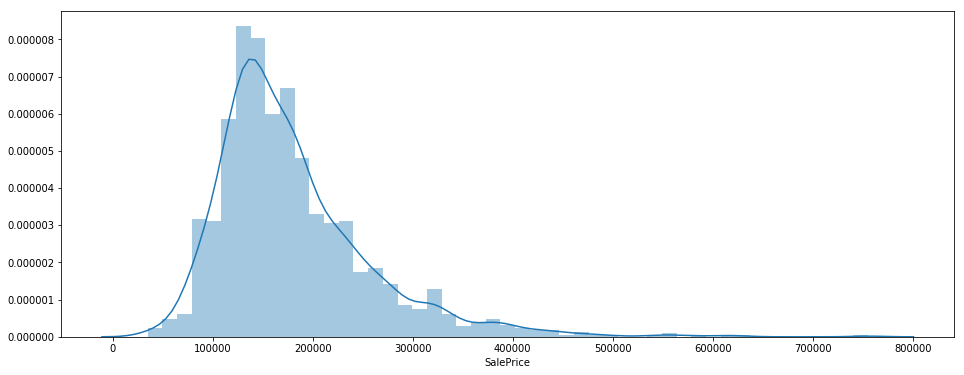

In [28]:
plt.figure(figsize=(16,6))
sns.distplot(house_price.SalePrice)
plt.show()

#### Creating train and test dataset for validation purpose

In [29]:
df_train,df_test = train_test_split(house_price,train_size=0.7,test_size=0.3,random_state=42)

In [30]:
house_price[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


#### Scaling the train dataset

#### Note as scale of our dependent valriable SalePrice is very different with the independent variable i am scaling the dependent variable 

In [31]:
num_col = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

#### Lets check the distribution again after scaling

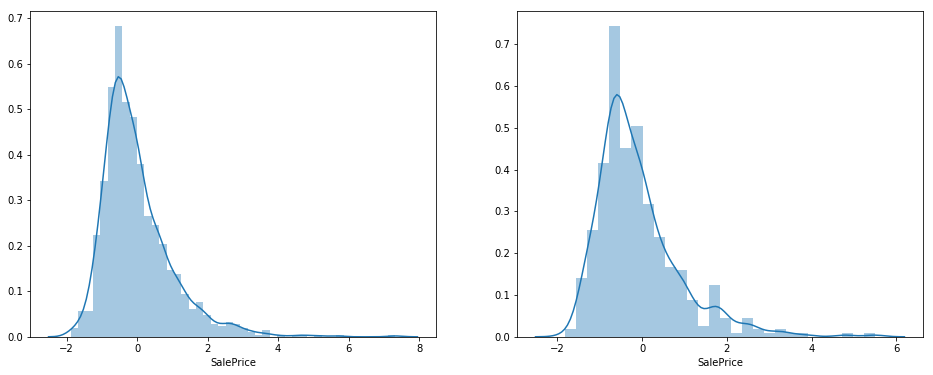

In [32]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

#### Spliting the dependent and independent variable

In [33]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [34]:
y_test = df_test.pop('SalePrice')
X_test = df_test

#### Now using  RFE  lets try to to find the optimal number of feature

#### Note : I cannot use RFE with GridSearchCV as 192 variable with 5 folds will create 960 fit and it will take more then 1 Hour to get the result so i am using RFE directly

In [35]:
len(X_train.columns)

192

In [36]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=70, step=1, verbose=0)

In [37]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [38]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

#### Lets filter the train and test set for the RFE selected columns

In [39]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

## Lets try first with the Lasso regression model

In [40]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9022070628442351
0.8575605370873767


In [41]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('MSSubClass', -1.305),
 ('LotArea', -0.112),
 ('LotShape', 0.194),
 ('LandSlope', 0.142),
 ('OverallQual', 0.091),
 ('OverallCond', 0.14),
 ('MasVnrArea', 0.038),
 ('ExterQual', -0.0),
 ('ExterCond', 0.061),
 ('BsmtQual', 0.0),
 ('BsmtCond', 0.058),
 ('BsmtExposure', -0.014),
 ('BsmtFinType1', 0.324),
 ('BsmtFinSF1', 0.118),
 ('BsmtFinType2', 0.091),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.085),
 ('TotalBsmtSF', -0.082),
 ('HeatingQC', 0.192),
 ('CentralAir', 0.0),
 ('1stFlrSF', 0.108),
 ('2ndFlrSF', 0.132),
 ('LowQualFinSF', 0.378),
 ('GrLivArea', 0.098),
 ('BsmtFullBath', 0.374),
 ('BsmtHalfBath', 0.541),
 ('FullBath', 0.145),
 ('HalfBath', 0.331),
 ('BedroomAbvGr', 0.086),
 ('KitchenAbvGr', 0.05),
 ('KitchenQual', -0.0),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', -1.991),
 ('GarageFinish', 0.0),
 ('GarageCars', 0.115),
 ('GarageArea', -0.0),
 ('GarageQual', -0.167),
 ('GarageCond', 0.094),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('Sc

#### Now lets try to improve our model with the optimal value of alpha using GridSearchCV

In [42]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    1.2s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [43]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.042187,0.004907,0.002692,0.000780,0.001,{'alpha': 0.001},0.858411,0.919698,0.823289,0.884340,...,0.909394,0.903553,0.900062,0.903985,0.898896,0.914493,0.902321,0.900008,0.903734,0.004663
1,0.011370,0.003546,0.002194,0.000598,0.010,{'alpha': 0.01},0.823570,0.882420,0.833992,0.851971,...,0.858367,0.854028,0.850813,0.852697,0.849232,0.880529,0.853551,0.849515,0.855800,0.008767
2,0.007282,0.000898,0.001994,0.000446,0.100,{'alpha': 0.1},0.734416,0.819997,0.769757,0.762736,...,0.789923,0.794550,0.790287,0.794322,0.783940,0.823288,0.791661,0.788672,0.794309,0.010282
3,0.006484,0.000668,0.001993,0.000446,1.000,{'alpha': 1.0},-0.006496,-0.021566,-0.018063,-0.001154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.006084,0.000537,0.002094,0.000299,5.000,{'alpha': 5.0},-0.006496,-0.021566,-0.018063,-0.001154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


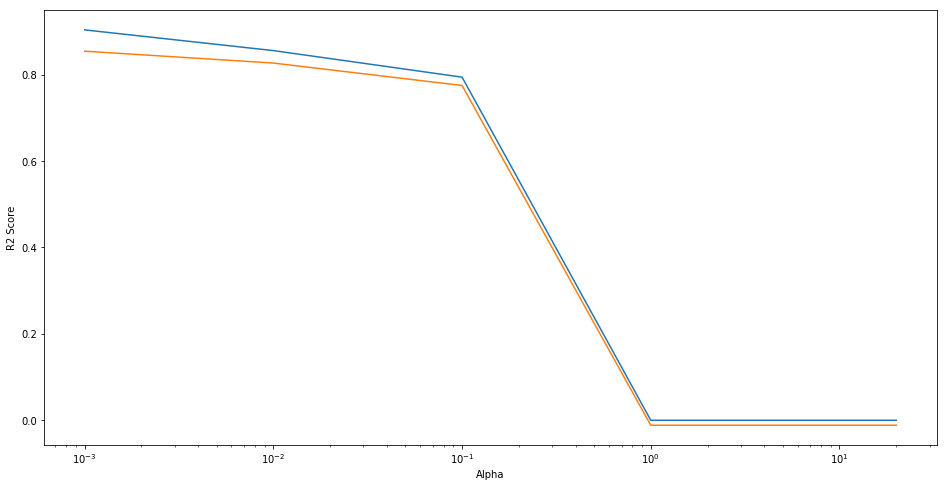

In [44]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [45]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [46]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9022070628442351
0.8575605370873767


In [47]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [48]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
44,MiscVal,1.520128
25,BsmtHalfBath,0.541487
22,LowQualFinSF,0.378263
24,BsmtFullBath,0.373994
27,HalfBath,0.331081
12,BsmtFinType1,0.324486
67,Neighborhood_Gilbert,0.282619
2,LotShape,0.194391
18,HeatingQC,0.192283
62,Neighborhood_BrkSide,0.160200


## Now lets use the ridge regression

In [49]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9078417854243198
0.8431546903792685


#### As we can see the above alpha value is not optimal for ridge there are sign of overfitting the clear difference we can see in the train and test score

#### Now lets try to improve our model with the optimal value of alpha using GridSearchCV

In [50]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0, 10.0, 20.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [51]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.006782,0.001984,0.001893,0.000536,0.001,{'alpha': 0.001},0.857227,0.921110,0.784247,0.888754,...,0.916101,0.909313,0.905491,0.909927,0.904539,0.919577,0.907990,0.905931,0.909453,0.004661
1,0.005286,0.001002,0.001695,0.000457,0.010,{'alpha': 0.01},0.857575,0.921076,0.787061,0.888717,...,0.916096,0.909311,0.905490,0.909925,0.904538,0.919576,0.907988,0.905930,0.909451,0.004660
2,0.005483,0.001279,0.001796,0.000870,0.100,{'alpha': 0.1},0.860001,0.920751,0.809467,0.888356,...,0.915691,0.909194,0.905370,0.909782,0.904416,0.919531,0.907858,0.905810,0.909308,0.004637
3,0.005386,0.000799,0.001695,0.000639,0.200,{'alpha': 0.2},0.861470,0.920400,0.826262,0.887979,...,0.914888,0.908941,0.905113,0.909515,0.904155,0.919430,0.907577,0.905550,0.909009,0.004601
4,0.005187,0.000870,0.001694,0.000457,0.500,{'alpha': 0.5},0.863293,0.919315,0.853065,0.886984,...,0.912117,0.907923,0.904085,0.908512,0.903113,0.918988,0.906440,0.904497,0.907857,0.004556


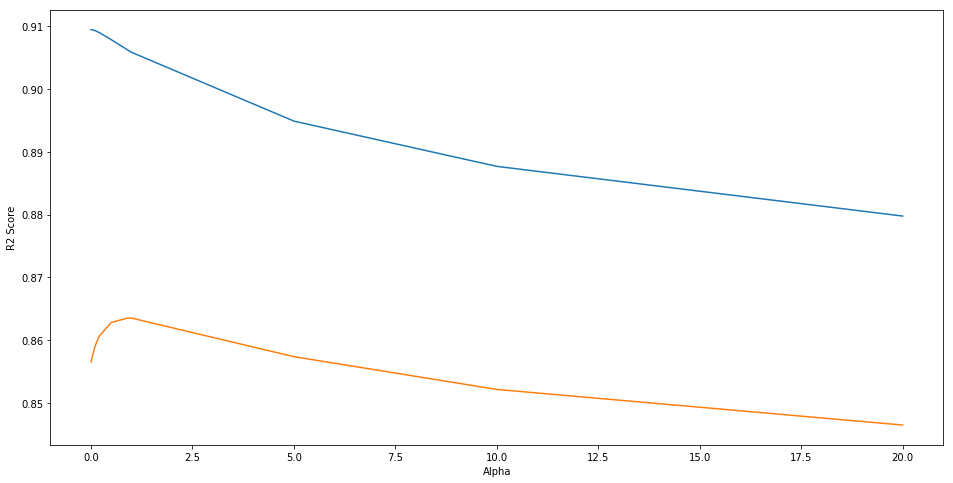

In [52]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

#### On the basis of above graph lets create the model

In [53]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.9}

In [54]:
ridge = Ridge(alpha = 0.9)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.905199009080942
0.851741176450402


In [55]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [56]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
44,MiscVal,1.482910
25,BsmtHalfBath,0.574493
27,HalfBath,0.421184
22,LowQualFinSF,0.419674
24,BsmtFullBath,0.399218
67,Neighborhood_Gilbert,0.338057
40,EnclosedPorch,0.335071
31,TotRmsAbvGrd,0.286967
23,GrLivArea,0.266793
68,Neighborhood_IDOTRR,0.261202


### After creating model in both Ridge and Lasso we can see that the r2_scores are almost same for both of them but as lasso will penalize more on the dataset and can also help in feature elemination i am goint to consider that as my final model.

## Final Model

In [57]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9022070628442351
0.8575605370873767


#### After compairing both the model we can see that the below Features are best explaining the DataSet

In [58]:
#MiscVal      : $Value of miscellaneous feature 
#BsmtHalfBath : Basement half bathrooms
#LowQualFinSF : Low quality finished square feet (all floors)
#BsmtFullBath : Basement full bathrooms
#HalfBath     : Half baths above grade

#### Best alpha value for Lasso : {'alpha': 0.001}

#### Best alpha value for Ridge : {'alpha': 0.9}